
# Homework 3: Random Variables and Their Distributions
***

**Name**: Catherine Xiao

***

This assignment is due on Canvas by **6:00PM on Friday October 22nd**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 03 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---


---

In [152]:
import pandas as pd
import numpy as np
import math
from math import factorial
import matplotlib.pylab as p
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.stats import poisson
from scipy.stats import norm
import scipy.integrate as integrate
%matplotlib inline

---

### [20 points] Problem 1

Suppose you are modeling the probability of observing flood levels of various heights when there is a storm in a particular coastal city.  Let $X$ be a random variable representing the observed flood height (in feet), which must be nonnegative. There are many different choices for probability density function (pdf) for $X$, but as the tide oscillates up and down, you decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         a \ |\sin(x)|  & 0 \leq x < 2\pi \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $a$ is some normalizing constant.

**Part A**: Determine the value of $a$ such that $f(x)$ is a valid density function. 

$\color{red}{\text{Solution to Part A here}}$  

**Solution**: $\large \int_0^{2\pi} a|sin(x)| dx = \int_0^{\pi} a sin(x) dx + -\int_{\pi}^{2\pi} a sin(x) dx = 1$  
2a - (-2a) = 4a = 1  
a = 1/4

**Part B**: Compute the cumulative density (cdf) function $F(x)$ for $X$.  

Then, conduct two sanity checks: First, what should $F(0)$ equal?  Second, what should $F(2\pi)$ equal?  Does your cdf function have the correct values for $F(0)$ and $F(2\pi)$? Be sure to **justify** these answers. 

$\color{red}{\text{Solution to Part B here}}$

**Solution**:

$ \large F(x) = \int_0^{x} \frac{1}{4}|sin(x)| dx $  

F(0) should be zero since at the start of the function the height is 0.  
$ \large F(0) = P(X <= 0) = \int_0^0 \frac{1}{4}|sin(x)| dx = 0 $  
$ F(2\pi)$  should be 1 since all the probabilities add up to 1 if you do an integral over 0 and 2pi.
$ \large F(2\pi) = P(X <= 2\pi) = \int_0^{2\pi} \frac{1}{4}|sin(x)| dx = \int_0^{\pi} \frac{1}{4} sin(x) dx + -\int_{\pi}^{2\pi} \frac{1}{4} sin(x) dx = \frac{2}{4}-(-\frac{2}{4}) = 1 $  

**Part C:**  Use the cdf you derived in **Part B** to calculate the median, $\tilde{x}$, of the probability density for $X$.

$\color{red}{\text{Solution to Part C here}}$

**Solution:**  
$ F(\tilde{x}) = P(X <= \tilde{x})= 0.5 $  
We know that the interval 0 to $\pi$ is positive and $\pi$ to $2\pi$ is negative.  
$ \large \int_0^{\tilde{x}} \frac{1}{4}sin(x)dx = -\frac{1}{4}cos(\tilde{x})-(-\frac{1}{4}) = \frac{1}{2} $  
$ \large -\frac{1}{4}cos(\tilde{x}) = \frac{1}{2}-\frac{1}{4} = \frac{1}{4}$  
$ \large cos(\tilde{x}) = -1 $ therefore, $\large \tilde{x} = \pi$ 

**Part D**: Use the cdf you computed in **Part B** to find the probability that a given storm will produce flood levels that exceed 4 feet. Give your answer to the nearest 4 decimals.

$\color{red}{\text{Solution to Part D here}}$

**Solution**:

$\large P(X > 4) = 1 - P(X <= 4) = 1 - \int_0^{4} \frac{1}{4}|sin(x)| dx = 1 - ( \int_0^{\pi} \frac{1}{4}sin(x)dx + - \int_\pi^{4} \frac{1}{4}sin(x)dx ) = 1 - (\frac{1}{2} + - (\frac{-1}{4}(cos(4)+1)) ) = 1 - (\frac{1}{2} + 0.086589) = 1 - 0.5866 = 0.4134 $ 

**Part E:** You have been painstakingly collecting data on storms in your city, and have determined that storms occur at an average rate of 5 per year. To makes things a bit more precise, the pdf from **Part A** really describes the distribution of flood heights *given* that there is a storm, $P(X \mid \text{storm})$. You may assume that storms occur as independent events of one another.

What is the probability of observing 3 storms in a given year, none of which produce flood levels that exceed 4 feet?

That is, what is $P(3 \ \text{storms producing flood levels under 4 feet} \cap 3 \text{ storms})$?

$\color{red}{\text{Solution to Part E here}}$

**Solution**: 

$ \large P(X <= 4) = 1 - P(X > 4) = 1 - 0.4134 = 0.5866 $  
$ \large \text{P(3 storms)} = \frac{5^{3}e^{-5}}{3!} = 0.14037$  
$ \large P(3 \ \text{storms producing flood levels under 4 feet} \cap 3 \text{ storms}) = 0.5866^{3} * 0.14037 = 0.028333 $

---

### [20 points] Problem 2

You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of times _between_ independent arrivals is often modeled using an Exponential distribution.  You observe the following:
* John's line checks-out an average of 4 customers per ten minutes,
* the self check-out machine checks-out an average of 5 customers per ten minutes **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per ten minutes if the machine is freezing up, and
* in any given moment, the self check-out machine has a probability of 0.1 of freezing up.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-customer times do in fact follow exponential distributions, what distributions do you expect the **number** of customers who pass through each line in a given 10-minute interval to follow?  What are the parameter(s) of each distribution?  Note that you should consider both the case where the self check-out is working properly and when it is broken.

$\color{red}{\text{Solution to Part A here}}$

**Solution**:  
The number of customers passing through each line in a given 10 minute interval would follow a Poisson distribution. The parameter for the distribution is the average num of customers in a 10 minute interval which is 4 if John's line or 5 if machine is working properly or 1 if freezing up. 

**Part B**:  What is the probability that 6 customers pass through John's line in the next 10 minutes?  What about the self check-out, assuming that it is working?  What about the self check-out, assuming that it is frozen?

$\color{red}{\text{Solution to Part B here}}$

**Solution**:  

Prob of 6 customers in John's line = $ \large P(X=6|John's line) = \large \frac{4^{6}e^{-4}}{6!} = 0.104 $  
Prob of 6 customers given that self check out is working = $ \large P(X=6|working) = \large \frac{5^{6}e^{-5}}{6!} = 0.1462 $  
Prob of 6 customers given that self check out is frozen = $ \large P(X=6|freezing) = \large \frac{1^{6}e^{-1}}{6!} = 5.109 * 10^{-4} $  


**Part C:**  Use your answer to **Part B** and the Law of Total Probability to calculate the probability that the self check-out tends 6 customers is the next 10 minutes.

$\color{red}{\text{Solution to Part C here}}$

**Solution:**
P(X=6 in self checkout) = $ P(X=6 |working)P(working) + P(X=6 |freezing)P(freezing) = 0.1462*0.9 + ( (5.109*10^{-4}) * 0.1) = 0.13158 + 5.109 * 10^{-5} = 0.1316  $

**Part D**:  S'pose John is working a 5-hour shift from 4-9 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  Calculate **exactly** (aside from rounding) the probability that he serves 100 or more customers during his shift.  (Assume we can safely scale our data up to a 5-hour interval.)

$\color{red}{\text{Solution to Part D here}}$

**Solution:**


In [153]:
# 5 hr = 300 min 
new_rate = 4 * 30  #customers per 5 hrs
prob_over_100 = 1 - poisson.cdf(k = 99, mu = new_rate)
print("The prob that John serves 100 or more customers during a 5 hr shift: ", prob_over_100)

The prob that John serves 100 or more customers during a 5 hr shift:  0.9721362601094794


**Part E**:  Write a function `checkout_count` to simulate the number of customers served by the self check-out machine in a 5-hour shift. At the very least, your function should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly. Your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. Then, your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken). Your function should return the number of customer arrivals in a 5-hour shift. Use at least 5000 simulations.

Use this function to estimate the probability of the self check-out machine serves 100 or more customers in a 5-hour shift, and report your result.

Finally, use **this same function**, to verify your answer to **Part D**.

**Caution!**  Be aware that in some Numpy or Scipy functions for distribution and/or random variables, the conventions for the parameter arguments may differ from those used in class.

$\color{red}{\text{Solution to Part E here}}$

**Solution:**

In [154]:
# return num customers arrived in 5 hr shift in self-checkout line
num_samples = 5000

def checkout_count(working_rate, broken_rate, p_working):
    checkout_options = np.array(["working", "frozen"])
    time_passed = 0
    total_customers = 0
    # In 5 hours, count the number of customers that pass 
    while time_passed < 1:
        checkout_line = np.random.choice(checkout_options, p = [p_working, 1-p_working])

        if checkout_line == "working":
            timePerCustomer = np.random.exponential(1/working_rate) # prob customer appeared in 5 hrs given rate
            total_customers += 1
            time_passed += timePerCustomer

        else:   
            timePerCustomer = np.random.exponential(1/broken_rate)
            total_customers += 1
            time_passed += timePerCustomer

    return total_customers

In [155]:
results = np.array([checkout_count(150,30,0.9) for ii in range(5000)])
print("Customer arrivals over 5000 simulations: " , np.sum(results))

Customer arrivals over 5000 simulations:  544721


In [156]:
results = np.array([checkout_count(150,30,0.9) for ii in range(5000)])
a = np.array([ii for ii in results if ii >= 100])
print("Prob of getting over 100 customers in the self checkout line during a 5 hr shift: " , len(a)/5000)

Prob of getting over 100 customers in the self checkout line during a 5 hr shift:  0.7356


In [157]:
results = np.array([checkout_count(120,0,1) for ii in range(5000)])
a = np.array([ii for ii in results if ii >= 100])
print("Prob of getting 100 customers during 5 hr shift in john's line: ", len(a)/5000)

Prob of getting 100 customers during 5 hr shift in john's line:  0.9786


**Part F:** Comment on the results you found in **Part E** for the probabilities that John and the self check-out machine will serve 100 or more customers in a 5-hour block. Which seems like a better investment for the grocery store?

$\color{red}{\text{Solution to Part F here}}$

**Solution:** 

It seems that John is a better investment for the grocery store because there is a higher probability that 100 or more customers are served in John's line. Whereas, the self checkout has a lower probability of serving 100+ customers which is probably due to the times that it gets frozen. 

---


### [20 points] Problem 3
***

Well. They're back at it. Luna and her cousin are honing their cinnamon stick skills, and this time they've got a _new_ tournament format. (They wouldn't have had to switch formats, but you figured out all the probabilities for their previous tournament format two weeks ago, so this is on you.)

The new format is a _Best-of-9 Series_ of individual duels. The first person to win 5 duels is declared the winner. Each duel can be considered to be independent of all previous duels. Moreover, a rigorous statistical analysis of Luna's and her cousin's strengths, weaknesses, and handwriting, has revealed that Luna has an edge: the probability that Luna wins any one duel against her cousin is given by $p=0.76$.

**Part A**: What is the probability that Luna wins the 9-duel series on the 8th duel? 

$\color{red}{\text{Solution to Part A here}}$

**Solution**:
8 duels required for 5 successes  
p = 0.76 = prob of success  
Neg Binom distribution  
$P(X = 8)$ = ${7}\choose{4}$ * $0.76^{5} * (1-0.76)^{8-5} = 0.122678 $

**Part B**: What is the probability that Luna wins the 9-duel series in _any_ valid number of duels? 

$\color{red}{\text{Solution to Part B here}}$

**Solution**:

Neg. binomial  
$\text {P(Luna wins)} = P(X=5) + P(X=6) + P(X=7) + P(X=8) + P(X=9) = $ ${4}\choose{4}$ $ * 0.76^{5} * (1-0.76)^{5-5}$ + ${5}\choose{4}$ $ * 0.76^{5} * (1-0.76)^{6-5}$ + ${6}\choose{4}$ $ * 0.76^{5} * (1-0.76)^{7-5}$ + ${7}\choose{4}$ $ * 0.76^{5} * (1-0.76)^{8-5}$ + ${8}\choose{4}$ $ * 0.76^{5} * (1-0.76)^{9-5}$ = 0.25355 + 0.30426 + 0.21907 + 0.12268 + 0.05889 = $ \large 0.95845$

**Part C**: The winner of the tournament will take home \$10,000. Because the stakes are so high, Luna has decided to hire a famous cinnamon stick consultant, Aishwarya, to help her prepare for each duel. 

With Aishwarya's help, Luna's probability of winning any given match increases to $p = 0.85$. Aishwarya charges a fee of $\$90$ per game, but as a testament to her confidence in her abilities, only charges Luna the \$90 for games that she wins and _only if Luna wins the whole tournament_.  So, if Luna competes in a 9-duel tournament and wins, she will take home $\$10,000$ _minus_ $\$450$ for Aishwarya's fees, for a total payout of $\$9,550$.  What is the expected payout for a 9-duel series?   

$\color{red}{\text{Solution to Part C here}}$

**Solution**:

$ \text{P(Luna wins)} = $ ${4}\choose{4}$ $ * 0.85^{5} * (1-0.85)^{5-5}$ + ${5}\choose{4}$ $ * 0.85^{5} * (1-0.85)^{6-5}$ + ${6}\choose{4}$ $ * 0.85^{5} * (1-0.85)^{7-5}$ + ${7}\choose{4}$ $ * 0.85^{5} * (1-0.85)^{8-5}$ + ${8}\choose{4}$ $ * 0.85^{5} * (1-0.85)^{9-5}$ = 0.44371 + 0.33278 + 0.1497505 + 0.052412 + 0.015723 = 0.99438


$ \large \text {Expected payout} = 0.99438 * 9550 = 9496.286 $

**Part D**: This year the Cinnamon Stick Rules Association (the CS Rules Assoc) is implementing an experimental rule: Since Luna is rumored to be the stronger duelist, she gets to _choose_ the length of the championship tournament! Specifically, she can choose the series to be any odd length, from $N=3, 5, 7 \dots, 99$ duels long. Assuming that Luna continues to use the service of Aishwarya, and considering the fact that Luna has a better-than-even chance of winning each duel, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 

$\color{red}{\text{Solution to Part D here}}$

***
**Solution**: 
If she chose a longer series format then she would have to win more duels in order to win the tournament. Then she would have to pay Aishmarya more for her services and the longer the tournament, the prob of winning the duel is smaller. 
With a short series, she wouldn't have to win as many games. 

**Part E**: Write a function `optimal_series` that takes in $p$, the probability that Luna wins an individual duel, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [158]:
def expected_payout(trials,gamesNeeded,p):
    prob_winning = 0
    for j in range(gamesNeeded,trials+1):
            n = j-1
            r = gamesNeeded-1
            prob_winning += ( ( factorial(n)/(factorial(n-r) * factorial(r) ) ) * (p**gamesNeeded) * ((1-p)**(j-gamesNeeded)) )
    expected_payout = prob_winning * (10000 - (gamesNeeded*90))
    return expected_payout

7

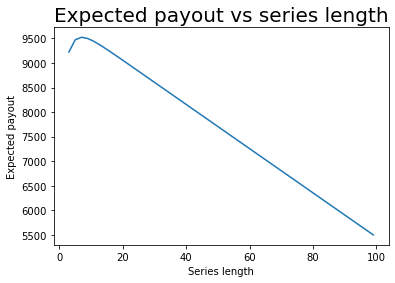

In [159]:
def optimal_series(p):
    all_payouts = []
    series_lengths = []
    prob_winning = 0
    for i in range(3,100,2):
        gamesNeededToWin = i//2 + 1
        all_payouts.append(expected_payout(i,gamesNeededToWin,p))
        series_lengths.append(i)
        
    # create plot 
    plt.plot(series_lengths, all_payouts)
    plt.title("Expected payout vs series length", fontsize = 20)
    plt.xlabel("Series length")
    plt.ylabel("Expected payout")

    max_index = all_payouts.index(max(all_payouts))
    optimal_series_length = ((max_index + 1) * 2) + 1 # Placeholder value to be replaced by you
    
    return optimal_series_length 
    
optimal_series(0.85)

### [20 points] Problem 4 - Monte Carlo Estimation of Definite Integrals

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a relatively simple integral. 

**Part A.** Consider the following function.

$$ f(x) = \frac{1}{4} \ \sin(x) $$   

Compute **by hand**, the integral of $f(x)$ for $0 \leq x \leq 2$. Once you have your expression worked out, you may use python to estimate the integral to the nearest 6th decimal place.  

$\color{red}{\text{Solution to Part A here}}$

**Solution:**  

By hand:
$\large \int_0^{2} \frac{1}{4}sin(x) = \frac{1}{4}(-cos(2)-(-cos(0))) = 0.354 $ 

In [160]:
#Using python: 
f = lambda x:np.sin(x) * 1/4
x = integrate.quad(f,0,2)
round(x[0],6)

0.354037

**Part B.** Suppose we sample a random variable $X$ from $U(0,2)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,2] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

$\color{red}{\text{Solution to Part B here}}$

**Solution:**

$\text{ The value estimates: dots under the curve/number of total dots = area under curve/area under rectangle}$

In [161]:
ratio = x[0]/2 # x[0] is all the values that fall under f(x) 
print(ratio)

0.1770183545683928


**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

$\color{red}{\text{Solution to Part C here}}$

**Solution:**

We could do Area under box * $\frac{\text{Area under curve}}{\text{Area under box}}$ since the Area under box is just a constant it will cancel and we will be left with Area under curve. 

**Part D.** Complete the function `integrate` below to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $\pi$, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,1)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

In [162]:
def integrate(num_samples, ub, isPlot):
    
    x_values = np.random.uniform(0,ub,num_samples)
    y_values = np.random.uniform(0,1,num_samples)
    Z = []
    
    xgraph1 = []
    ygraph1 = []

    xgraph2 = []
    ygraph2 = []


    for i in range(len(x_values)):
        calculation = math.sin(x_values[i]) * 1/4
        if y_values[i] < calculation:
            Z.append(1)
            xgraph1.append(x_values[i])
            ygraph1.append(y_values[i])
        else:
            Z.append(0)
            xgraph2.append(x_values[i])
            ygraph2.append(y_values[i])

    estimate = (np.sum(Z)*ub)/num_samples
    variance = np.var(Z, ddof = 1)
    if isPlot == True:    #make plot
        fig, ax = plt.subplots(figsize = (10,6))
        x = np.linspace(0,ub,num_samples)
        y = np.sin(x)/4
        ax.plot(x,y,'b-', label = "f(x)")
        
        plt.scatter(xgraph1,ygraph1,label="below curve")
        plt.scatter(xgraph2,ygraph2,label="above curve")
        
        plt.legend()
    return estimate, variance

**Part E.** Write your own small unit tests!

First, what should your `integrate` function output if you plug in `ub=0`? Set that as `int_0_to_0` below.

Second, what should your `integrate` function output if you plug in `ub=pi`? Set that as `int_0_to_pi` below.

Then, you can execute the cell below to run two sanity checks. Write out **in math** (like, a definite integral) what each of these two tests is checking and **why** that is a reasonable sanity check.

If these two assertions run without fail, then things seem to be working okay. Note that the upper endpoint test is stochastic, so if it fails, try running it a few times. If it fails a lot, then things are probably going wrong.

Estimate of integral from 0 to 0: 0.0  Variance:  0.0


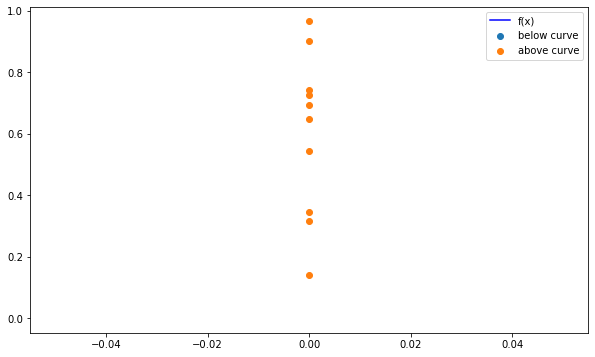

In [163]:
e1, v1 = integrate(10,0,True)
print("Estimate of integral from 0 to 0:", e1, " Variance: ", v1)

Estimate and variance of integral from 0 to pi:  0.3141592653589793  Variance of sample:  0.10000000000000002


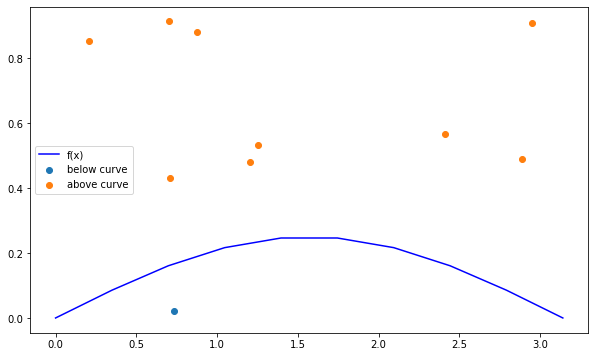

In [164]:
e2, v2 = integrate(10,math.pi,True)
print("Estimate and variance of integral from 0 to pi: ", e2 , " Variance of sample: ", v2)

**Part F.** Run your simulation with `isPlot=True` and `ub=2` for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral. Be sure to leave your cells evaluated for the graders! Does your estimate agree with the exact value of the integral you computed in **Part A**? 

estimate:  0.3524 variance:  0.14516807680768073


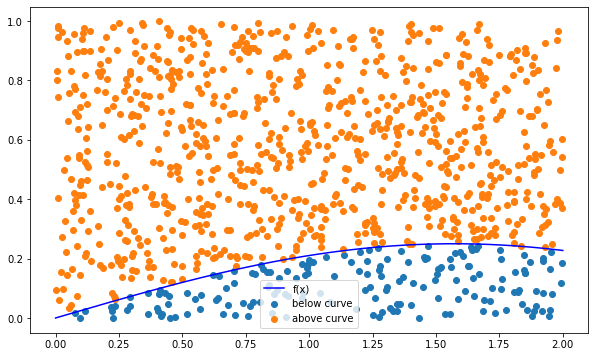

In [165]:
integrate(1000,2,True)
e,v = integrate(10000,2,False)
print("estimate: ", e, "variance: ", v)

### [20 points] Problem 5 - Probabilities and the Normal Distribution

You bring many donuts to work to share with your coworkers at the Boulder Nuclear Power Planet. But due to the high levels of radiation there, they must be inspected for safety. In particular, if the mean level of radiation in a sample from your batch of donuts is above [190 mSv (millisievert)](https://en.wikipedia.org/wiki/Sievert), then they are deemed unsafe and you must throw the whole batch away.

You know that historically donuts at the power plant have, on average, 178 mSv of radiation, with a standard deviation of 65 mSv. For the test (to see if the donuts must be thrown away) you take the donut receipt and pick every fifth donut off it, and sample the radiation levels of those donuts. Assume you bought 245 donuts. 

**Part A:** What type of sample is this? What is the sample and what is the size of it? What is the sample space?

$\color{red}{\text{Solution to Part A here}}$

**Solution:**

This is a systematic sample and the sample consists of every 5th donut picked off the receipt. The sample size is 49. The sample space is any value between 243 mSv and 113 mSv.

**Part B:** What is the probability that a donut batch is deemed unsafe?  You should at the very least set up and justify your calculation by hand (in Markdown/Mathjax), before executing any calculations in Python. But feel free to use python to actually do the calculations. You ***should*** use Python to retrieve critical values of a standard normal random variable (using a Z chart is so old school!).

$\color{red}{\text{Solution to Part B here}}$

**Solution:**

$\large Z = \frac{\bar{X} - \mu}{\sigma} * \sqrt{n} = \frac{{190} - 178}{65} * \sqrt{49} = 1.292307692 $  
$\large P(\bar{X} > 190) =  P(Z > 1.2923) = 1 - P(Z <= 1.2923)$  

In [166]:
print("prob donut batch is unsafe: ", 1- norm.cdf(1.2923))

prob donut batch is unsafe:  0.09812663598702431


**Part C.** Yikes! Seems like those donuts might be dangerous, but you really do not want to throw away donuts that frequently, so you propose to store the donuts in a lead-lined donut box. But lead also is not very good for your health, so you are motivated to use the least amount of lead possible. What is the maximum mean amount of radiation $\mu$ for our donuts to have such that the probability that we will throw donuts out due to safety concerns is at most 0.02?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

$\color{red}{\text{Solution to Part C here}}$

**Solution:**

$ P(\bar{X} > 190) < 0.02 $  
$ P(Z > z) = 0.02 $  
$ P(Z <= z) = 0.98 $

In [167]:
norm.ppf(0.98)

2.0537489106318225

$\large z = \frac{190-\mu}{65} * \sqrt{49} = 2.0537 $   
$\mu = 170.93 \approx 170 $

**Part D.**  Your supervisor at the plant decides that serving up donuts in a lead-lined box is a bad idea. Fair enough.

But she is still imposing the requirement that the probability of a batch of donuts being rejected must be less than 0.02. However, she knows a different bakery that might be the solution. At Johnny's Super Consistent Baked Goods Emporium all the donuts are exactly the same in size, which means they are closer to being exactly the same in radiation content (less deviation). Suppose the mean and sample size remain unchanged. What is the largest standard deviation to satisfy this requirement?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

$\color{red}{\text{Solution to Part D here}}$

**Solution:**

$\large z = \frac{190-178}{\sigma} * \sqrt{49} = 2.0537 $   
$\sigma = 40.9 \approx 40 $

**Part E.** Can you think of any potential issues with using a normal distribution to model the radiation content of our donuts? Think about a really wide standard deviation, and a way smaller mean (say $\mu = 2$). 

$\color{red}{\text{Solution to Part E here}}$

**Solution:**

A potential issue with using the normal distribution is that there cannot be negative values for radiation. So if the mean is small and sd is really big then the data is going really skewed. 